# Granger Causality Stocks

Table of context:
- [China](#china)
- [USA](#usa)
- [Japan](#japan)
- [Switzerland](#swiss)
- [USA 10 stocks](#usa10)

In [82]:
import ipynb 
import pandas as pd
from importlib import reload
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [83]:
import granger_causality_functions
reload(granger_causality_functions)
from granger_causality_functions import scale_data, plot_time_series, plot_correlation_matrix, make_stationary
from granger_causality_functions import grangers_causality_matrix, network_granger, granger_causality

In [84]:
countries_of_interest = ["USA", "CHE", "JPN", "CHN"]

In [85]:
# upload data
datasets_chn = pd.read_csv("datasets/China_returns.csv")
datasets_us = pd.read_csv("datasets/USA_returns.csv")
datasets_jpn = pd.read_csv("datasets/Japan_returns.csv")
datasets_swiss = pd.read_csv("datasets/Switzerland_returns.csv")

## China <a class="anchor" id="china"></a>

In [86]:
country = 'China'
datasets_chn = datasets_chn.set_index('Date')
datasets_chn.head()

,MOUTAI,MINDRAY,BABA,CTGDF,FOSHAN
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-4.552203,-1.292074,-1.260411,1.032757,-2.398145
2020-01-06,-0.052854,-0.775285,-0.165899,-1.077159,-1.698129
2020-01-07,1.534335,2.310041,0.456982,1.011113,2.296848
2020-01-08,-0.583807,-0.304371,0.170011,0.428996,0.160376


In [87]:
stocks_interest = datasets_chn.columns

In [88]:
df_stocks_scaled = scale_data(datasets_chn, stocks_interest)
df_stocks_scaled = df_stocks_scaled.iloc[1:]
df_stocks_scaled.head()

,MOUTAI,MINDRAY,BABA,CTGDF,FOSHAN
Date,,,,,
2020-01-03,-0.216768,-0.061526,-0.060018,0.049178,-0.114195
2020-01-06,-0.002517,-0.036918,-0.007900,-0.051292,-0.080862
2020-01-07,0.073062,0.110000,0.021761,0.048147,0.109372
2020-01-08,-0.027800,-0.014494,0.008096,0.020428,0.007637
2020-01-09,0.063715,0.256660,0.082567,0.140821,0.072659


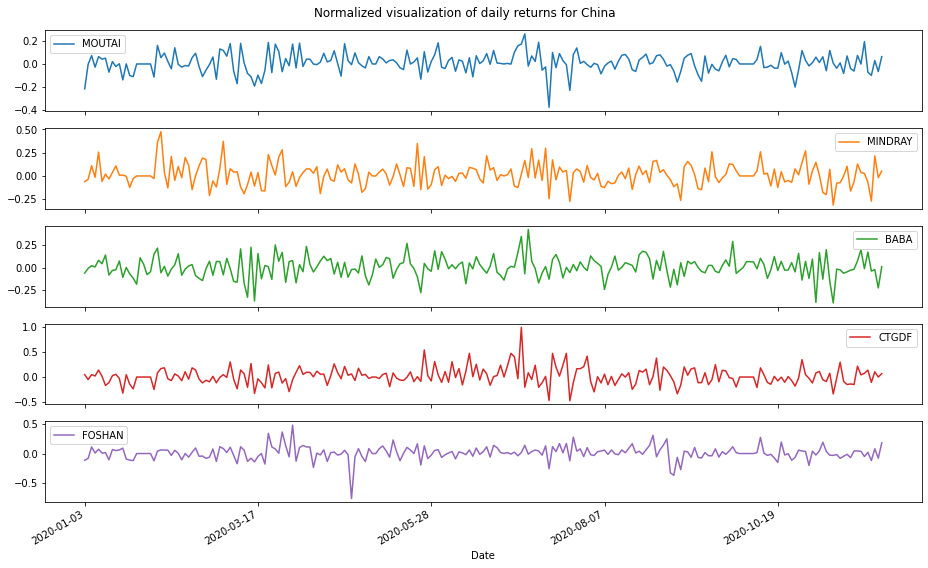

In [89]:
title_plot = 'Normalized visualization of daily returns for ' + country
plot_time_series(df_stocks_scaled, title_plot, country)

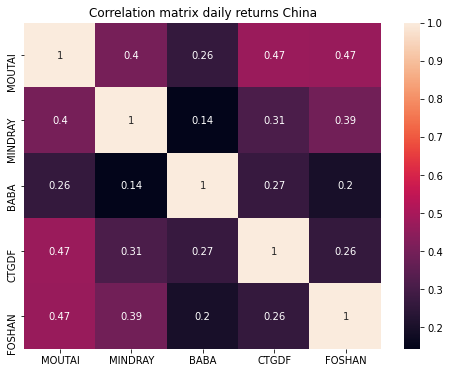

In [90]:
title_plot = 'Correlation matrix daily returns ' + country
plot_correlation_matrix(df_stocks_scaled, countries_of_interest, title_plot, country)

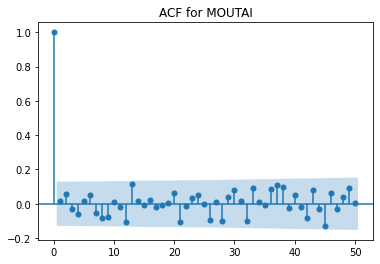

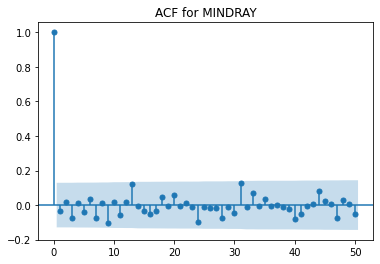

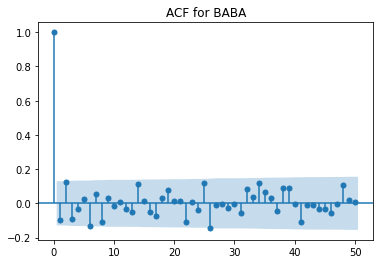

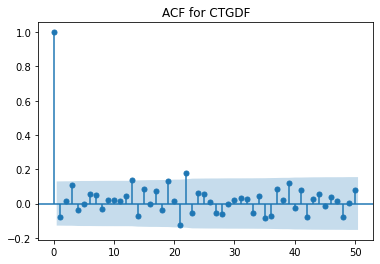

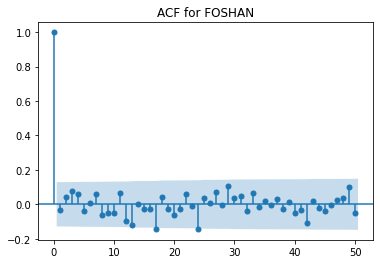

In [91]:
for a in df_stocks_scaled:
    sm.graphics.tsa.plot_acf(df_stocks_scaled[a], lags = 50)
    plt.title('ACF for %s' % a)
    plt.show()

STATIONARY TEST: 

 Dickey-Fuller Stationary Test for "MOUTAI" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -15.0732
 No. Lags Chosen      = 0
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "MINDRAY" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -15.6273
 No. Lags Chosen      = 0
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "BABA" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -9.8664
 No. Lags Chosen      

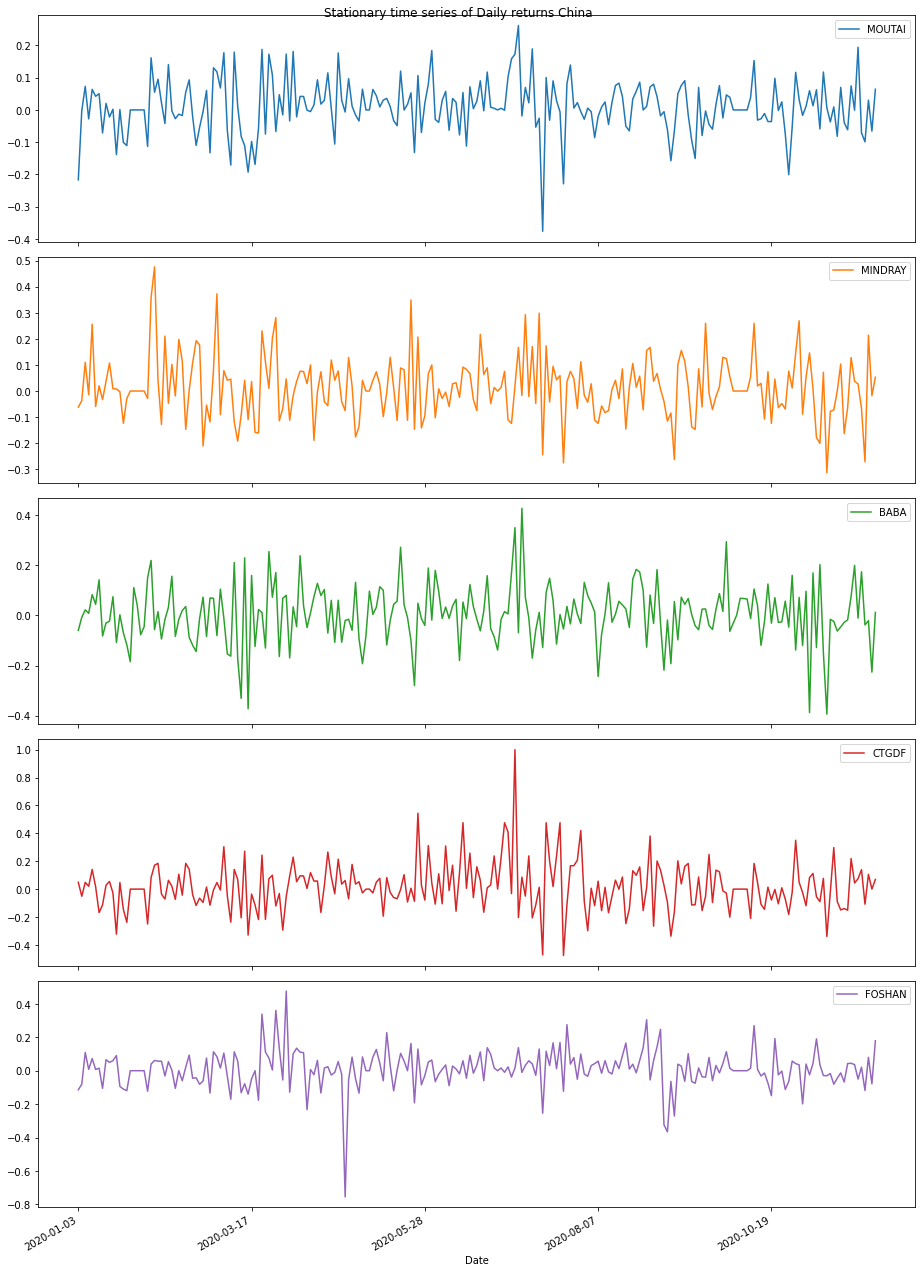


GRANGER CAUSALITY MATRIX: 



,MOUTAI_x,MINDRAY_x,BABA_x,CTGDF_x,FOSHAN_x
MOUTAI_y,0.0,0.0,0.0,0.0,0.0
MINDRAY_y,0.393,0.0,0.0,0.0,0.165
BABA_y,0.0,0.0,0.0,0.0,0.16
CTGDF_y,0.0,0.0,0.386,0.0,0.57
FOSHAN_y,0.193,0.197,0.0,0.0,0.0


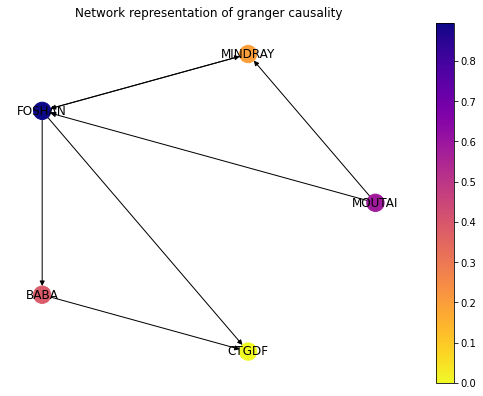

In [92]:
title_plot = 'Daily returns ' + country
granger_matrix = granger_causality(df_stocks_scaled, stocks_interest, title_plot, country)

## USA <a class="anchor" id="usa"></a>

In [93]:
country = 'USA'
datasets_chn = datasets_us.set_index('Date')
datasets_chn.head()

,BRK-A,AMZN,GOOG,GOOGL,NFLX,ADBE,NVDA,TMO,ASML,AVGO
Date,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.907495,-1.213905,-0.490720,-0.523134,-1.185532,-0.783421,-1.600590,-1.087714,-1.611453,-2.543500
2020-01-06,0.311067,1.488559,2.465710,2.665406,3.046945,0.572615,0.419362,0.718666,-0.795453,-0.149599
2020-01-07,-0.384762,0.209156,-0.062401,-0.193165,-1.512666,-0.095885,1.210654,0.565908,1.086013,-0.344250
2020-01-08,0.084685,-0.780866,0.788033,0.711776,2.572943,1.343766,0.187564,0.159027,1.037513,-1.247453


In [94]:
stocks_interest = datasets_chn.columns

In [95]:
df_stocks_scaled = scale_data(datasets_chn, stocks_interest)
df_stocks_scaled = df_stocks_scaled.iloc[1:]
df_stocks_scaled.head()

,BRK-A,AMZN,GOOG,GOOGL,NFLX,ADBE,NVDA,TMO,ASML,AVGO
Date,,,,,,,,,,
2020-01-03,-0.051215,-0.068508,-0.027694,-0.029523,-0.066906,-0.044213,-0.090330,-0.061386,-0.090943,-0.143544
2020-01-06,0.017555,0.084008,0.139154,0.150424,0.171956,0.032316,0.023667,0.040558,-0.044892,-0.008443
2020-01-07,-0.021714,0.011804,-0.003522,-0.010901,-0.085368,-0.005411,0.068324,0.031937,0.061290,-0.019428
2020-01-08,0.004779,-0.044069,0.044473,0.040170,0.145206,0.075836,0.010585,0.008975,0.058553,-0.070401
2020-01-09,0.067802,0.027085,0.062330,0.059246,-0.059886,0.043095,0.061981,0.036359,-0.009534,-0.045332


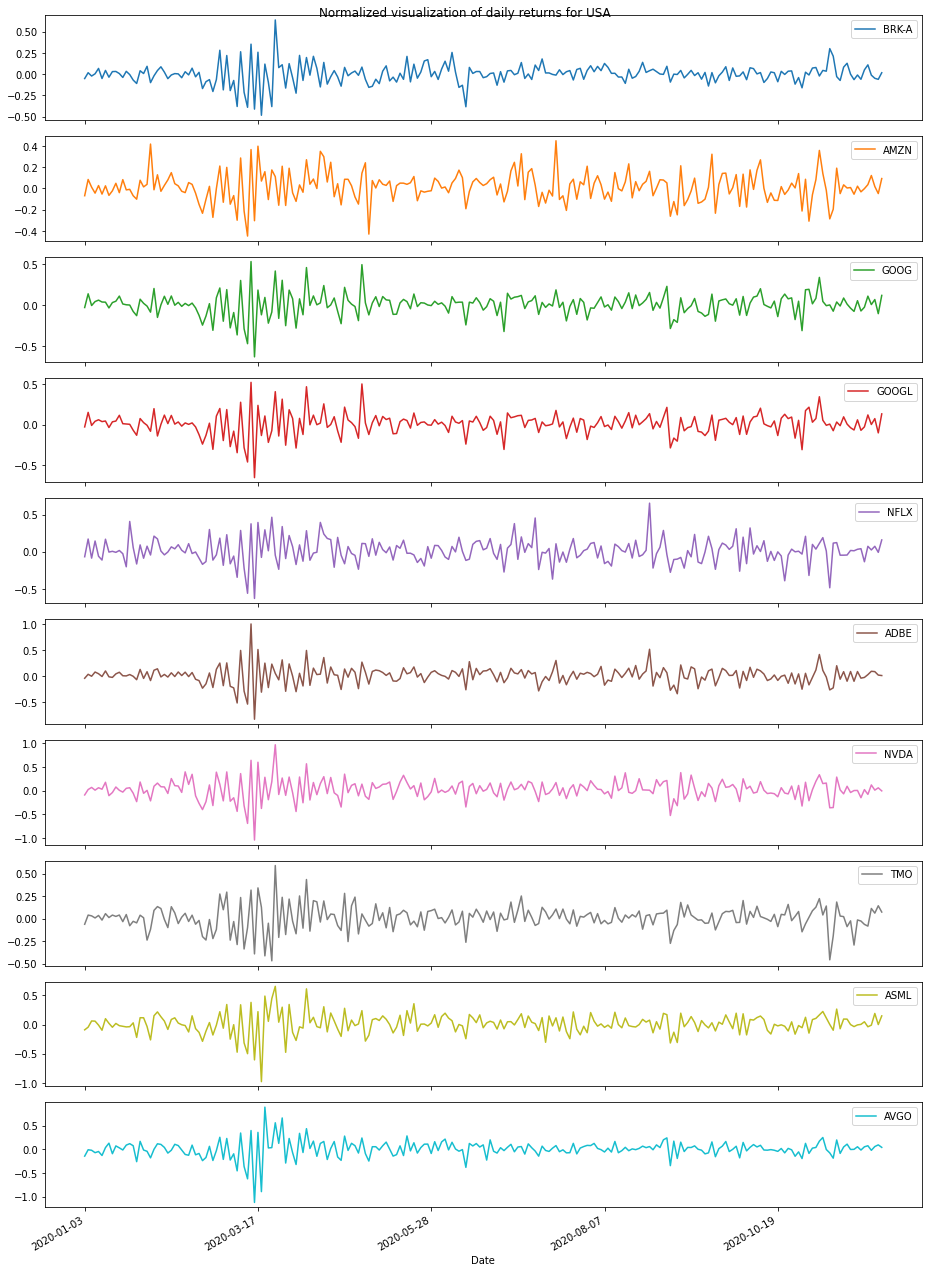

In [96]:
title_plot = 'Normalized visualization of daily returns for ' + country
plot_time_series(df_stocks_scaled, title_plot, country)

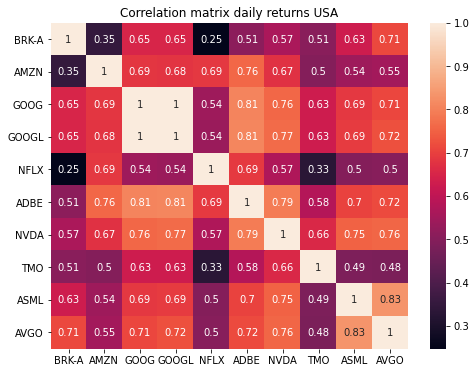

In [97]:
title_plot = 'Correlation matrix daily returns ' + country
plot_correlation_matrix(df_stocks_scaled, countries_of_interest, title_plot, country)

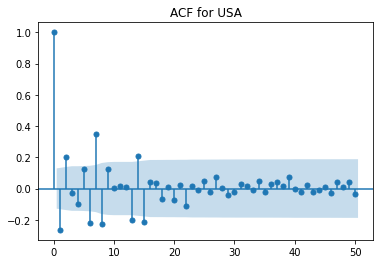

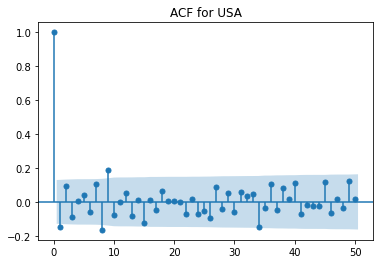

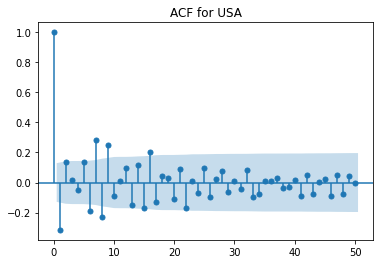

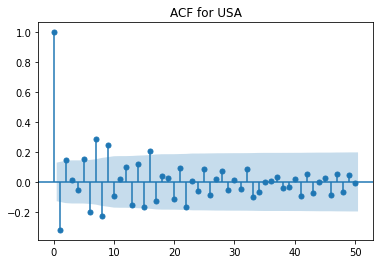

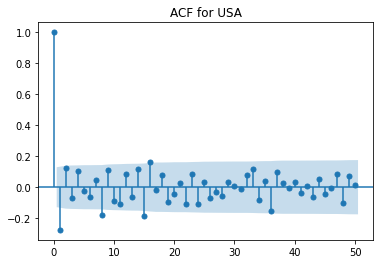

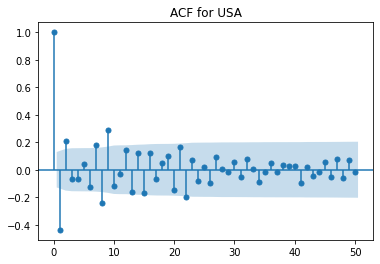

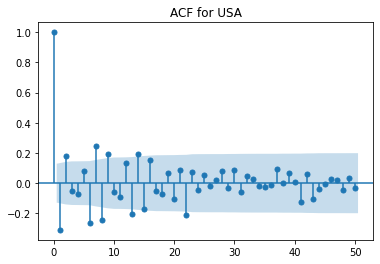

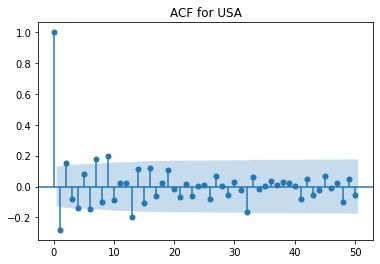

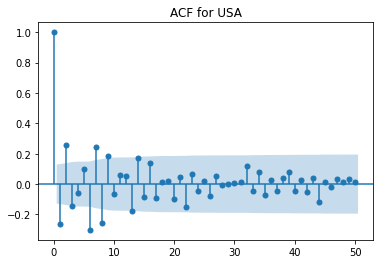

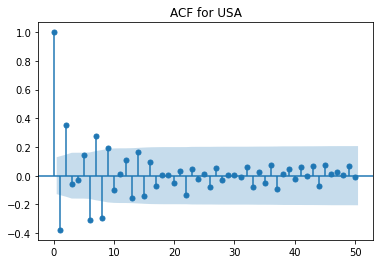

In [98]:
for a in df_stocks_scaled:
    sm.graphics.tsa.plot_acf(df_stocks_scaled[a], lags = 50)
    plt.title('ACF for %s' % country)
    plt.show()

STATIONARY TEST: 

 Dickey-Fuller Stationary Test for "BRK-A" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -4.7067
 No. Lags Chosen      = 6
 Critical value 1%     = -3.46
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0001. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "AMZN" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -17.4941
 No. Lags Chosen      = 0
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "GOOG" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -3.9168
 No. Lags Chosen      = 8

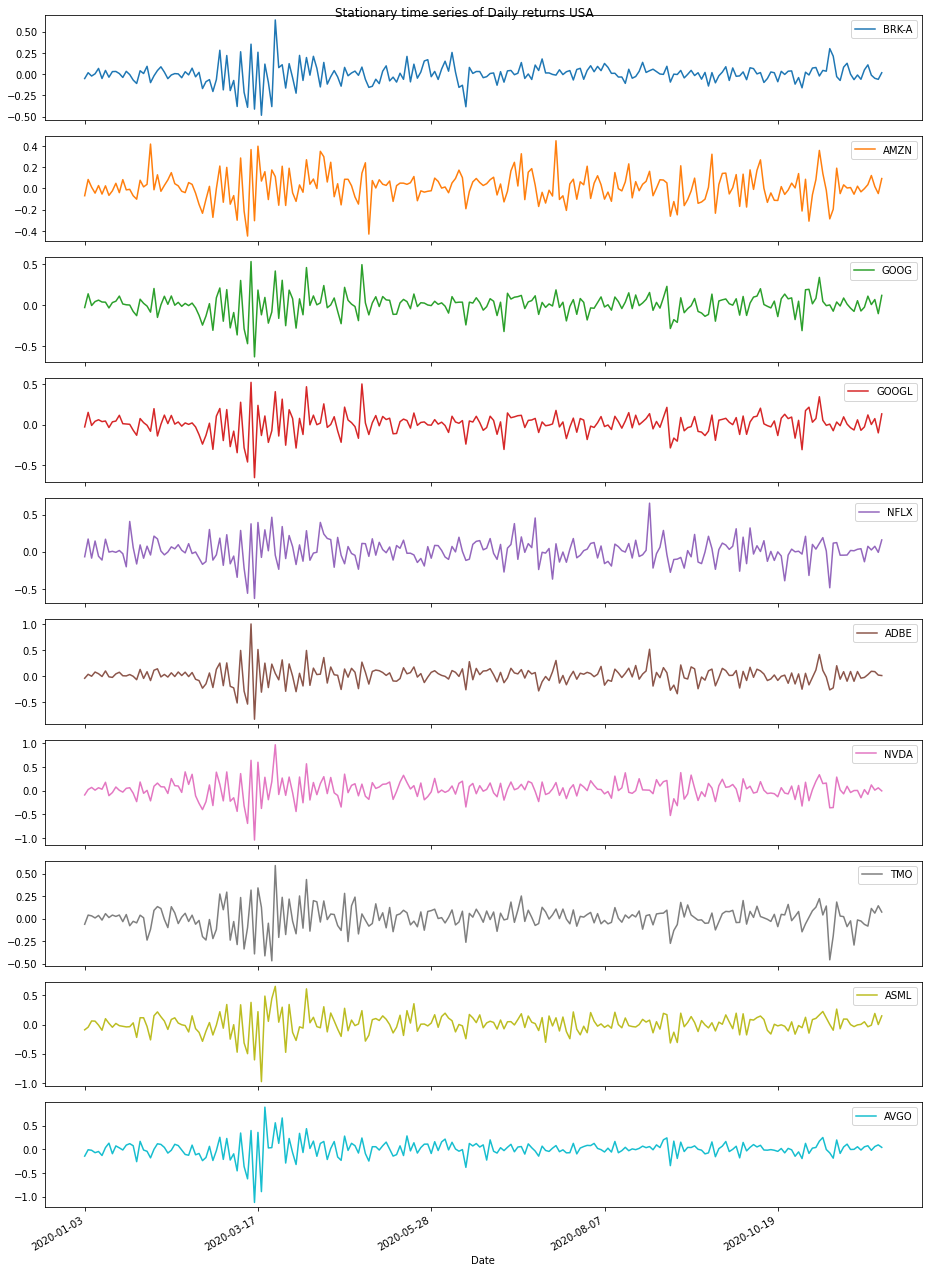


GRANGER CAUSALITY MATRIX: 



,BRK-A_x,AMZN_x,GOOG_x,GOOGL_x,NFLX_x,ADBE_x,NVDA_x,TMO_x,ASML_x,AVGO_x
BRK-A_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AMZN_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GOOG_y,0.0,0.31,0.0,0.254,0.0,0.0,0.121,0.0,0.0,0.0
GOOGL_y,0.0,0.346,0.307,0.0,0.0,0.0,0.116,0.0,0.0,0.0
NFLX_y,0.0,0.0,0.0,0.0,0.0,0.0,0.124,0.211,0.0,0.0
ADBE_y,0.0,0.0,0.0,0.0,0.249,0.0,0.0,0.0,0.127,0.0
NVDA_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TMO_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ASML_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVGO_y,0.0,0.388,0.0,0.0,0.0,0.0,0.0,0.0,0.492,0.0


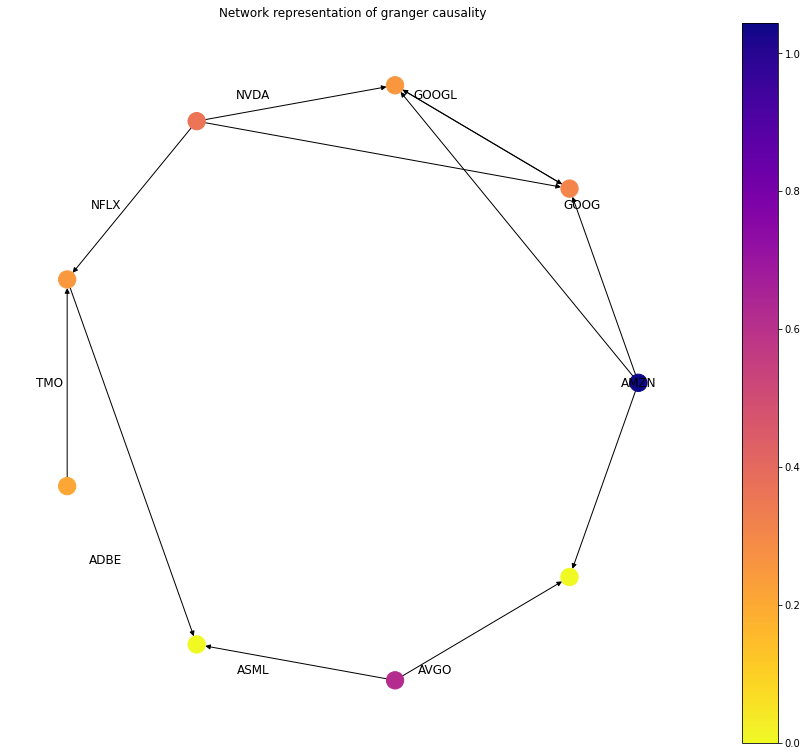

In [99]:
title_plot = 'Daily returns ' + country
granger_matrix = granger_causality(df_stocks_scaled, stocks_interest, title_plot, country)

## Japan <a class="anchor" id="japan"></a>

In [100]:
country = 'Japan'
datasets_chn = datasets_jpn.set_index('Date')
datasets_chn.head()

,MITSUB,MITSY,SZKMY,TM,SNE
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.000000,-0.796055,-0.521729,-1.047525,-1.419052
2020-01-06,0.000000,1.763106,-0.956556,0.014212,1.512923
2020-01-07,1.196250,0.174922,0.490420,0.525674,1.577196
2020-01-08,-1.559015,0.637486,-0.898203,-0.247327,0.370376


In [101]:
stocks_interest = datasets_chn.columns

In [102]:
df_stocks_scaled = scale_data(datasets_chn, stocks_interest)
df_stocks_scaled = df_stocks_scaled.iloc[1:]
df_stocks_scaled_japan = df_stocks_scaled
df_stocks_scaled.head()

,MITSUB,MITSY,SZKMY,TM,SNE
Date,,,,,
2020-01-03,0.000000,-0.049826,-0.032656,-0.065566,-0.088821
2020-01-06,0.000000,0.110356,-0.059872,0.000890,0.094696
2020-01-07,0.074875,0.010949,0.030696,0.032903,0.098719
2020-01-08,-0.097581,0.039901,-0.056220,-0.015481,0.023182
2020-01-09,0.063179,0.015515,0.069399,-0.028822,0.050635


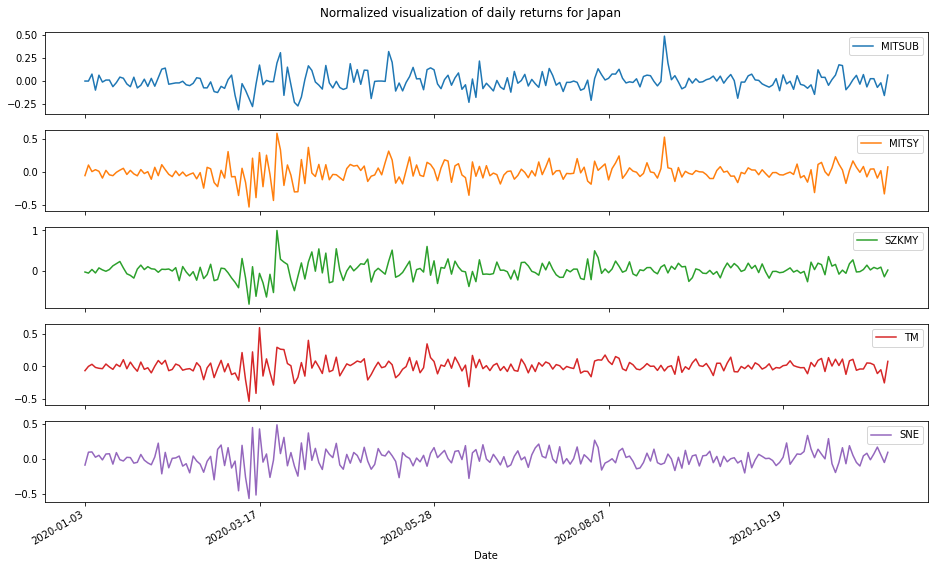

In [103]:
title_plot = 'Normalized visualization of daily returns for ' + country
plot_time_series(df_stocks_scaled, title_plot, country)

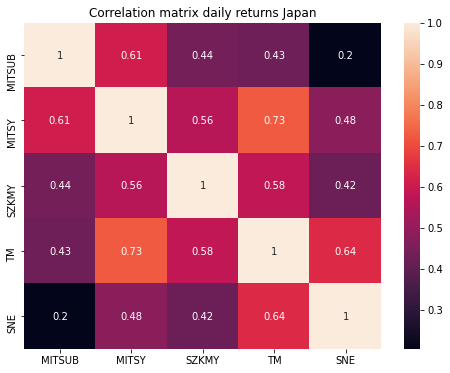

In [104]:
title_plot = 'Correlation matrix daily returns ' + country
plot_correlation_matrix(df_stocks_scaled, countries_of_interest, title_plot, country)

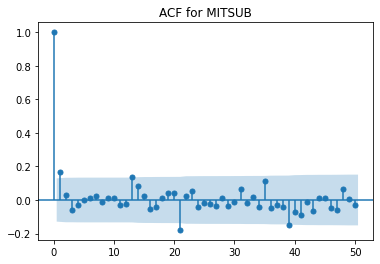

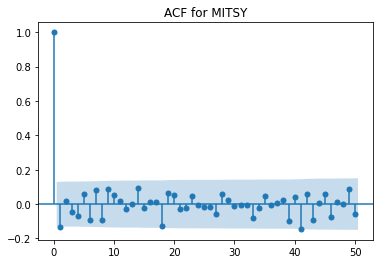

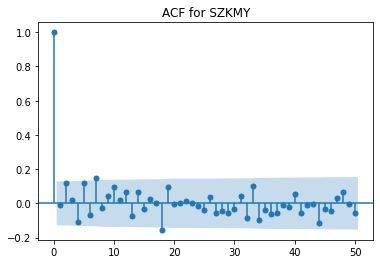

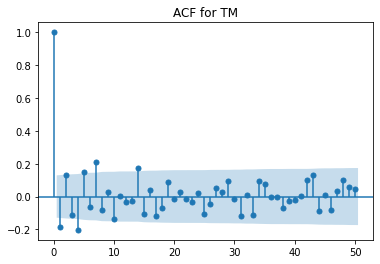

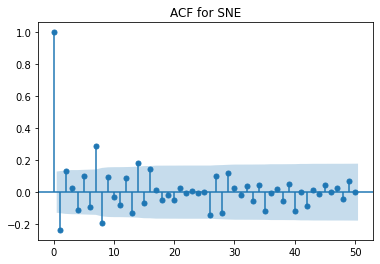

In [105]:
for a in df_stocks_scaled:
    sm.graphics.tsa.plot_acf(df_stocks_scaled[a], lags = 50)
    plt.title('ACF for %s' % a)
    plt.show()

STATIONARY TEST: 

 Dickey-Fuller Stationary Test for "MITSUB" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -12.7087
 No. Lags Chosen      = 0
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "MITSY" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -17.2202
 No. Lags Chosen      = 0
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "SZKMY" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -4.7715
 No. Lags Chosen      =

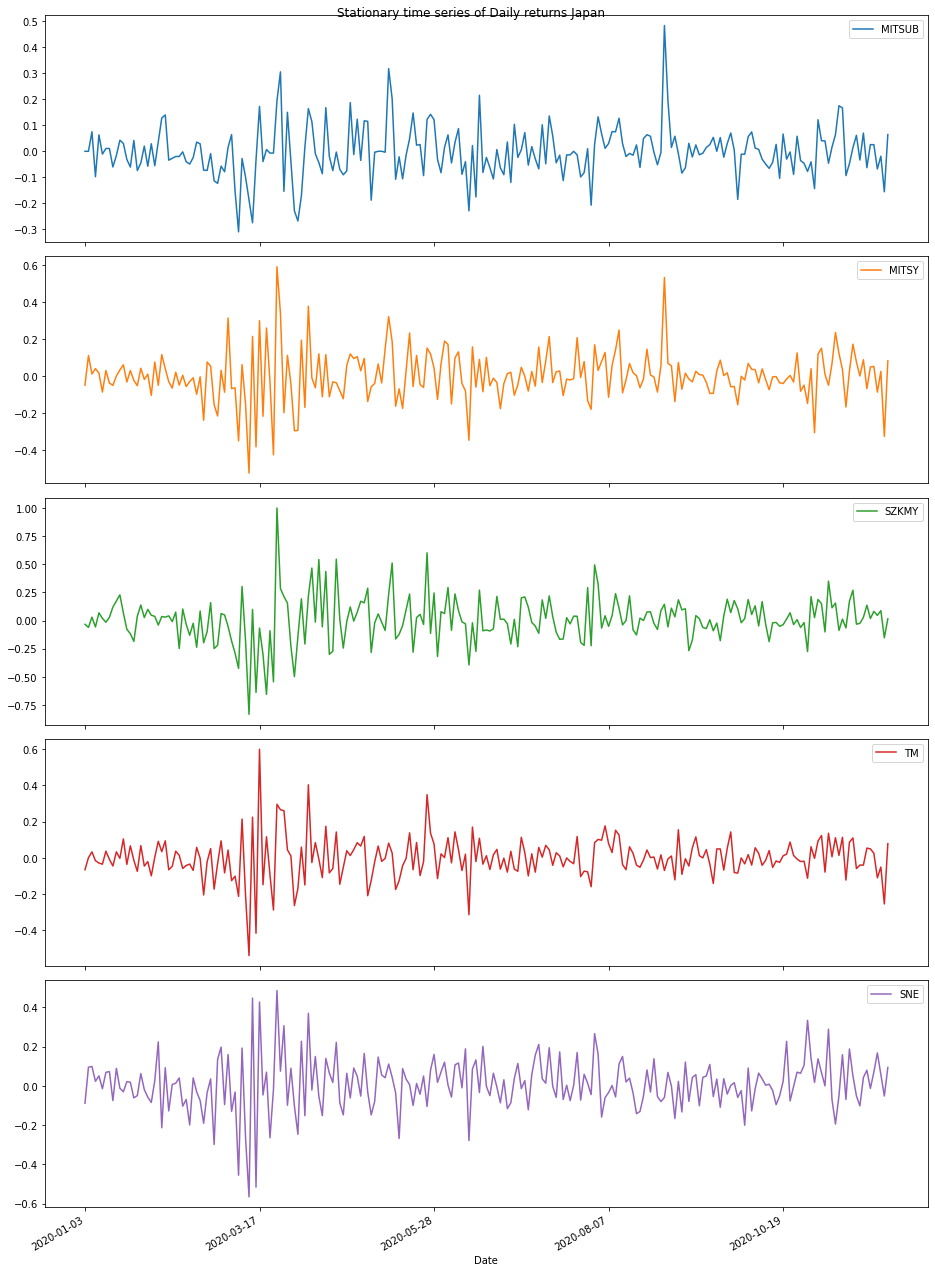


GRANGER CAUSALITY MATRIX: 



,MITSUB_x,MITSY_x,SZKMY_x,TM_x,SNE_x
MITSUB_y,0.0,0.0,0.119,0.0,0.193
MITSY_y,0.0,0.0,0.0,0.0,0.0
SZKMY_y,0.0,0.0,0.0,0.0,0.0
TM_y,0.0,0.0,0.0,0.0,0.0
SNE_y,0.0,0.145,0.232,0.127,0.0


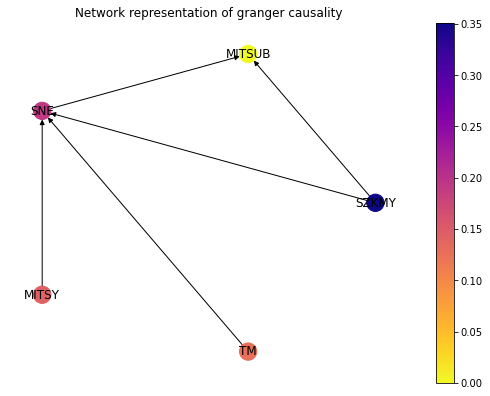

In [106]:
title_plot = 'Daily returns ' + country
granger_matrix = granger_causality(df_stocks_scaled, stocks_interest, title_plot, country)

## Switzerland <a class="anchor" id="swiss"></a>

In [107]:
country = 'Switzerland'
datasets_chn = datasets_swiss.set_index('Date')
datasets_chn.head()

,BRK-A,AMZN,GOOG,GOOGL,NFLX,ADBE,NVDA,TMO,ASML,AVGO
Date,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.907495,-1.213905,-0.490720,-0.523134,-1.185532,-0.783421,-1.600590,-1.087714,-1.611453,-2.543500
2020-01-06,0.311067,1.488559,2.465710,2.665406,3.046945,0.572615,0.419362,0.718666,-0.795453,-0.149599
2020-01-07,-0.384762,0.209156,-0.062401,-0.193165,-1.512666,-0.095885,1.210654,0.565908,1.086013,-0.344250
2020-01-08,0.084685,-0.780866,0.788033,0.711776,2.572943,1.343766,0.187564,0.159027,1.037513,-1.247453


In [108]:
stocks_interest = datasets_chn.columns

In [109]:
df_stocks_scaled = scale_data(datasets_chn, stocks_interest)
df_stocks_scaled = df_stocks_scaled.iloc[1:]
df_stocks_scaled.head()

,BRK-A,AMZN,GOOG,GOOGL,NFLX,ADBE,NVDA,TMO,ASML,AVGO
Date,,,,,,,,,,
2020-01-03,-0.051215,-0.068508,-0.027694,-0.029523,-0.066906,-0.044213,-0.090330,-0.061386,-0.090943,-0.143544
2020-01-06,0.017555,0.084008,0.139154,0.150424,0.171956,0.032316,0.023667,0.040558,-0.044892,-0.008443
2020-01-07,-0.021714,0.011804,-0.003522,-0.010901,-0.085368,-0.005411,0.068324,0.031937,0.061290,-0.019428
2020-01-08,0.004779,-0.044069,0.044473,0.040170,0.145206,0.075836,0.010585,0.008975,0.058553,-0.070401
2020-01-09,0.067802,0.027085,0.062330,0.059246,-0.059886,0.043095,0.061981,0.036359,-0.009534,-0.045332


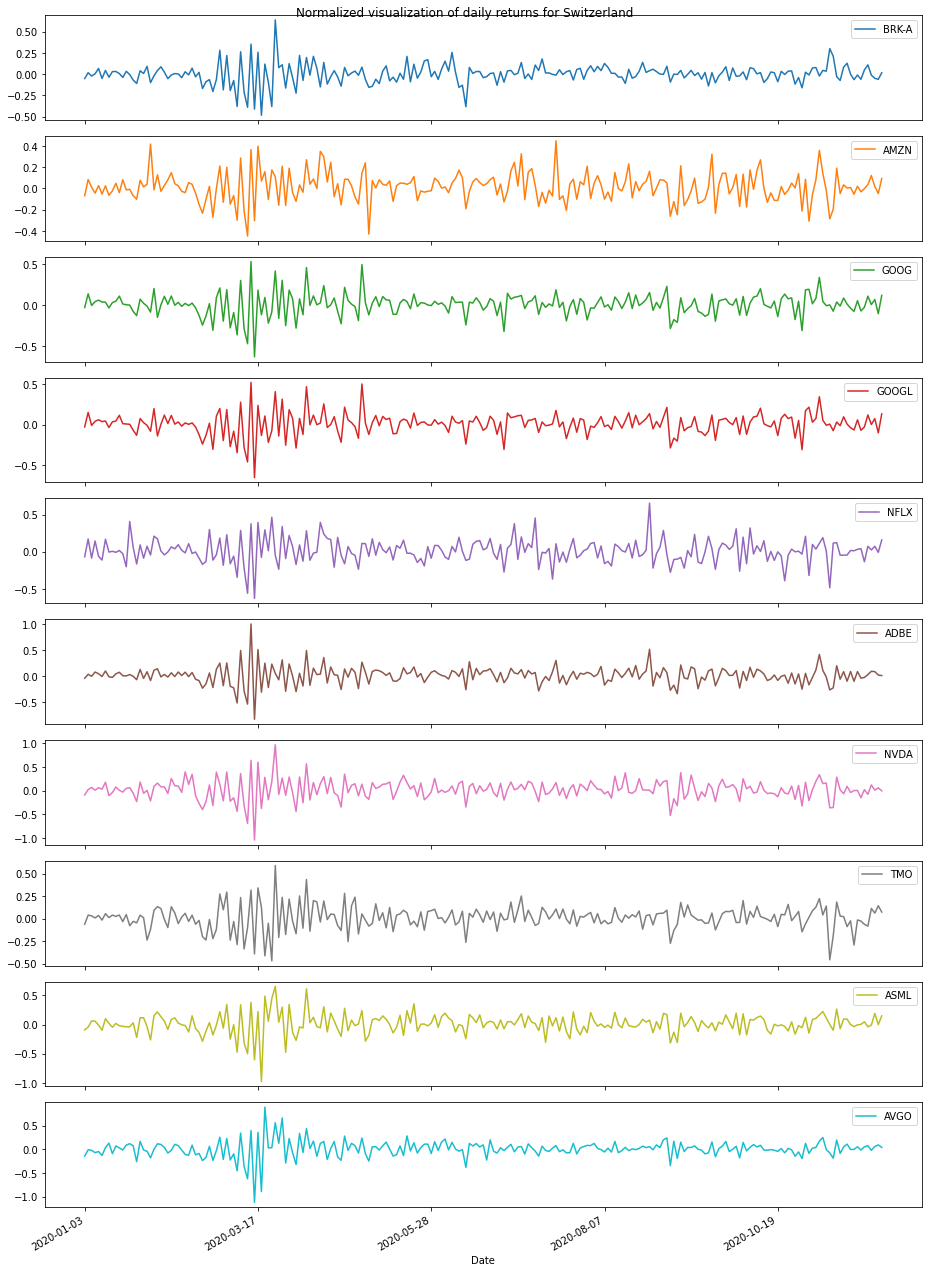

In [110]:
title_plot = 'Normalized visualization of daily returns for ' + country
plot_time_series(df_stocks_scaled, title_plot, country)

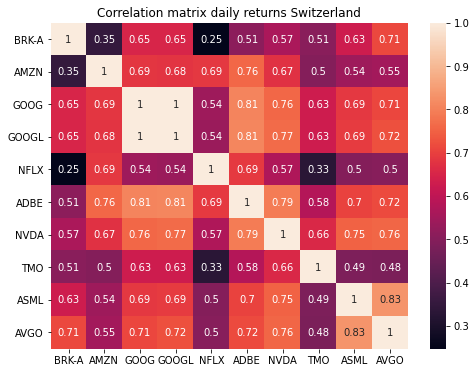

In [111]:
title_plot = 'Correlation matrix daily returns ' + country
plot_correlation_matrix(df_stocks_scaled, countries_of_interest, title_plot, country)

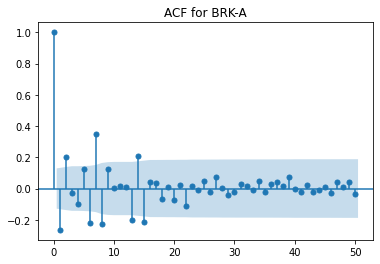

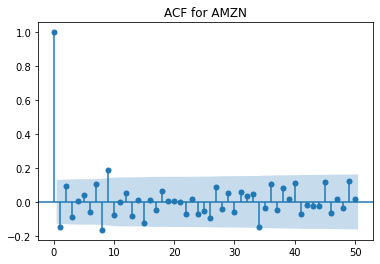

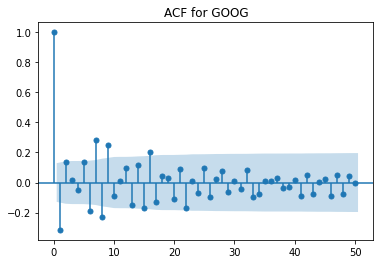

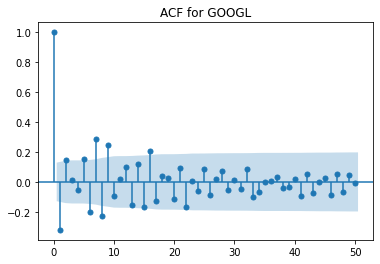

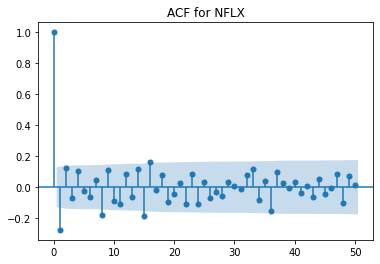

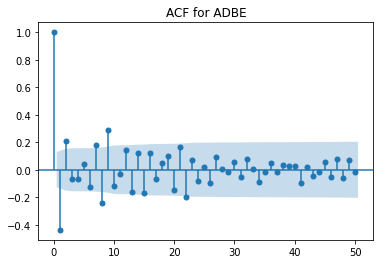

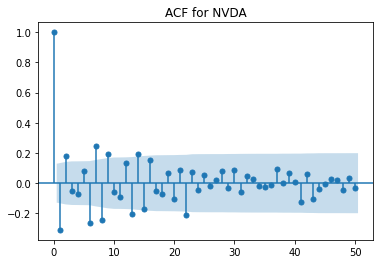

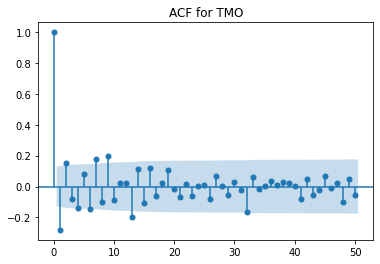

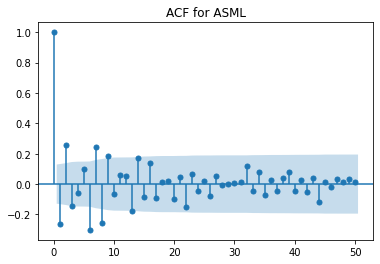

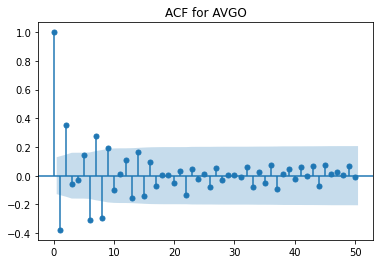

In [112]:
for a in df_stocks_scaled:
    sm.graphics.tsa.plot_acf(df_stocks_scaled[a], lags = 50)
    plt.title('ACF for %s' % a)
    plt.show()

STATIONARY TEST: 

 Dickey-Fuller Stationary Test for "BRK-A" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -4.7067
 No. Lags Chosen      = 6
 Critical value 1%     = -3.46
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0001. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "AMZN" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -17.4941
 No. Lags Chosen      = 0
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "GOOG" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -3.9168
 No. Lags Chosen      = 8

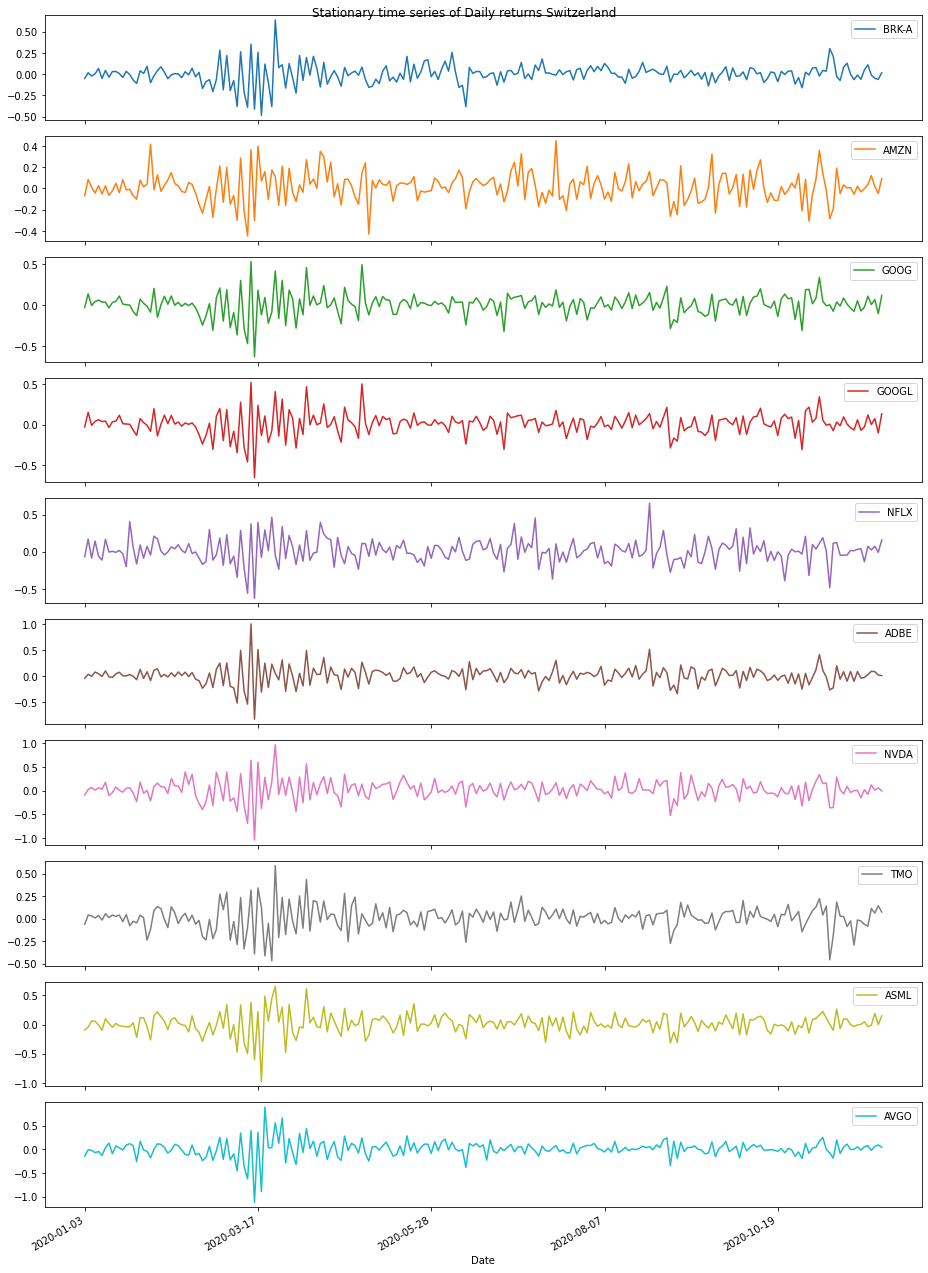


GRANGER CAUSALITY MATRIX: 



,BRK-A_x,AMZN_x,GOOG_x,GOOGL_x,NFLX_x,ADBE_x,NVDA_x,TMO_x,ASML_x,AVGO_x
BRK-A_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AMZN_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GOOG_y,0.0,0.31,0.0,0.254,0.0,0.0,0.121,0.0,0.0,0.0
GOOGL_y,0.0,0.346,0.307,0.0,0.0,0.0,0.116,0.0,0.0,0.0
NFLX_y,0.0,0.0,0.0,0.0,0.0,0.0,0.124,0.211,0.0,0.0
ADBE_y,0.0,0.0,0.0,0.0,0.249,0.0,0.0,0.0,0.127,0.0
NVDA_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TMO_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ASML_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVGO_y,0.0,0.388,0.0,0.0,0.0,0.0,0.0,0.0,0.492,0.0


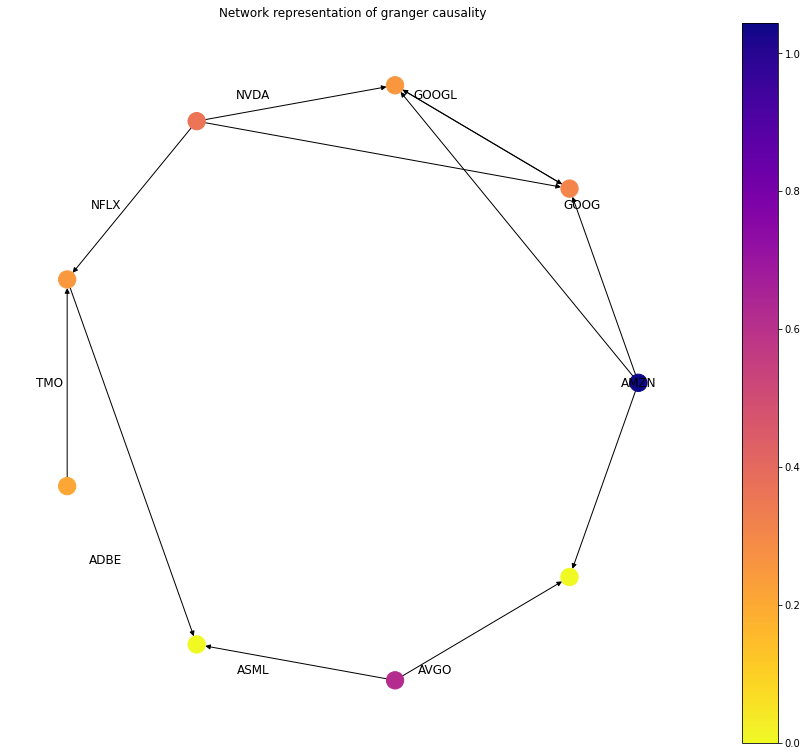

In [113]:
title_plot = 'Daily returns ' + country
granger_matrix = granger_causality(df_stocks_scaled, stocks_interest, title_plot, country)

## USA 10 stocks

In [114]:
country = 'USA'

In [115]:
# import tickers
import tickers
reload(tickers)
from tickers import us_tickers, ticker_id

In [116]:
import stock_analysis_functions
reload(stock_analysis_functions)
from stock_analysis_functions import data_from_yahoo, extract_max, returns

In [117]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2020, 12, 1)

In [118]:
adj_close_usa = pd.read_csv('datasets/USA_adj_close.csv')
adj_close_usa = adj_close_usa.set_index('Date')
adj_close_usa.head()

,AAPL,MSFT,AMZN,GOOG,GOOGL,FB,TSLA,BABA,TSM,BRK-A,...,TMO,XOM,CSCO,ABBV,ORCL,CVX,ACN,AVGO,QCOM,DHR
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,74.444603,158.936279,1898.010010,1367.369995,1368.680054,209.779999,86.052002,219.770004,58.484699,342261,...,325.585876,65.656494,46.776043,84.852608,52.815155,114.918457,206.829712,308.307312,86.475868,154.468597
2020-01-03,73.720840,156.957260,1874.969971,1360.660034,1361.520020,208.669998,88.601997,217.000000,56.555992,339155,...,322.044434,65.128654,46.012867,84.047203,52.629150,114.520988,206.485229,300.465515,84.847565,153.512543
2020-01-06,74.308266,157.362961,1902.880005,1394.209961,1397.810059,212.600006,90.307999,216.639999,55.903347,340210,...,324.358856,65.628716,46.177094,84.710480,52.903263,114.132973,205.136902,300.016022,84.350296,153.970657
2020-01-07,73.958794,155.928177,1906.859985,1393.339966,1395.109985,213.059998,93.811996,217.630005,56.809258,338901,...,326.194427,65.091606,45.877617,84.227234,53.020737,112.675552,200.707962,298.983215,86.748894,155.484390
2020-01-08,75.148521,158.411835,1891.969971,1404.319946,1405.040039,215.220001,98.428001,218.000000,57.228115,339188,...,326.713165,64.110008,45.906601,84.824188,53.227238,111.388489,201.101685,295.253540,86.495377,155.643707


In [119]:
index = adj_close_usa.index

In [120]:
# name first 10
name_important_stocks = extract_max(adj_close_usa, 10, Names=True)

# dataset first 10
adj_close_imp = adj_close_usa[name_important_stocks]
adj_close_imp.head()

,BRK-A,AMZN,GOOG,GOOGL,NFLX,ADBE,NVDA,TMO,ASML,AVGO
Date,,,,,,,,,,
2020-01-02,342261,1898.010010,1367.369995,1368.680054,329.809998,334.429993,239.514771,325.585876,300.128174,308.307312
2020-01-03,339155,1874.969971,1360.660034,1361.520020,325.899994,331.809998,235.681122,322.044434,295.291748,300.465515
2020-01-06,340210,1902.880005,1394.209961,1397.810059,335.829987,333.709991,236.669479,324.358856,292.942841,300.016022
2020-01-07,338901,1906.859985,1393.339966,1395.109985,330.750000,333.390015,239.534729,326.194427,296.124237,298.983215
2020-01-08,339188,1891.969971,1404.319946,1405.040039,339.260010,337.869995,239.984009,326.713165,299.196564,295.253540


In [121]:
df_returns = returns(adj_close_imp.columns, adj_close_imp, index, country)
df_returns.head()

,BRK-A,AMZN,GOOG,GOOGL,NFLX,ADBE,NVDA,TMO,ASML,AVGO
Date,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.907495,-1.213905,-0.490720,-0.523134,-1.185532,-0.783421,-1.600590,-1.087714,-1.611453,-2.543500
2020-01-06,0.311067,1.488559,2.465710,2.665406,3.046945,0.572615,0.419362,0.718666,-0.795453,-0.149599
2020-01-07,-0.384762,0.209156,-0.062401,-0.193165,-1.512666,-0.095885,1.210654,0.565908,1.086013,-0.344250
2020-01-08,0.084685,-0.780866,0.788033,0.711776,2.572943,1.343766,0.187564,0.159027,1.037513,-1.247453


In [122]:
stocks_interest = df_returns.columns

In [123]:
df_stocks_scaled = scale_data(df_returns, stocks_interest)
df_stocks_scaled = df_stocks_scaled.iloc[1:]
df_stocks_scaled.head()

,BRK-A,AMZN,GOOG,GOOGL,NFLX,ADBE,NVDA,TMO,ASML,AVGO
Date,,,,,,,,,,
2020-01-03,-0.051215,-0.068508,-0.027694,-0.029523,-0.066906,-0.044213,-0.090330,-0.061386,-0.090943,-0.143544
2020-01-06,0.017555,0.084008,0.139154,0.150424,0.171956,0.032316,0.023667,0.040558,-0.044892,-0.008443
2020-01-07,-0.021714,0.011804,-0.003522,-0.010901,-0.085368,-0.005411,0.068324,0.031937,0.061290,-0.019428
2020-01-08,0.004779,-0.044069,0.044473,0.040170,0.145206,0.075836,0.010585,0.008975,0.058553,-0.070401
2020-01-09,0.067802,0.027085,0.062330,0.059246,-0.059886,0.043095,0.061981,0.036359,-0.009534,-0.045332


In [124]:
title_plot = 'Normalized visualization of daily returns for ' + country


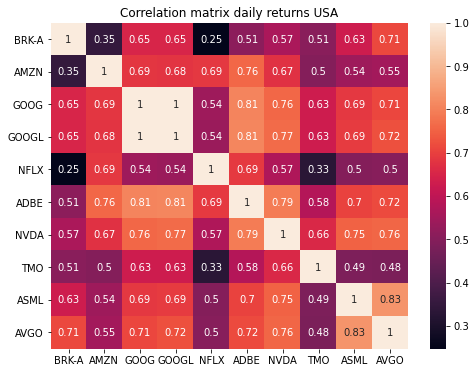

In [125]:
title_plot = 'Correlation matrix daily returns ' + country
plot_correlation_matrix(df_stocks_scaled, countries_of_interest, title_plot, country + '10')

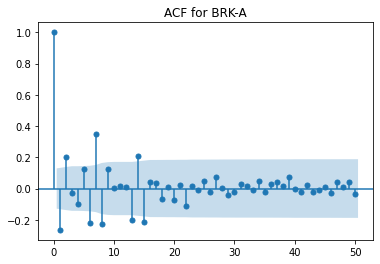

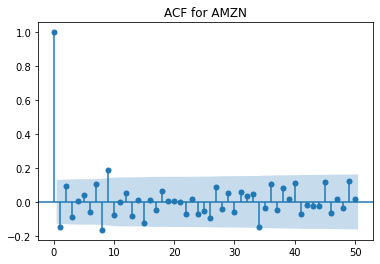

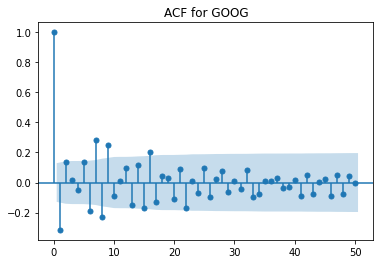

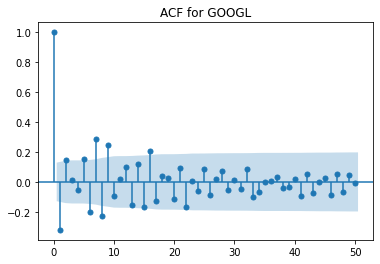

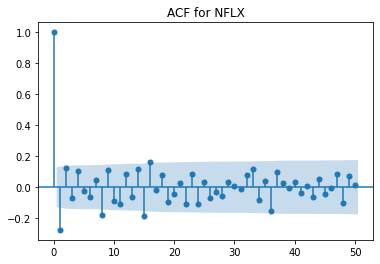

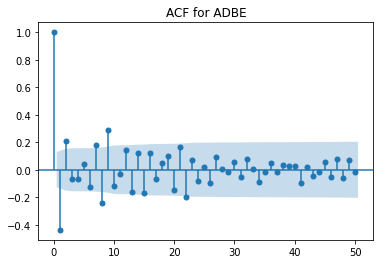

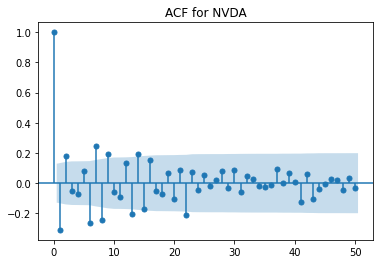

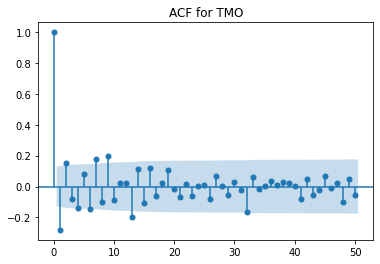

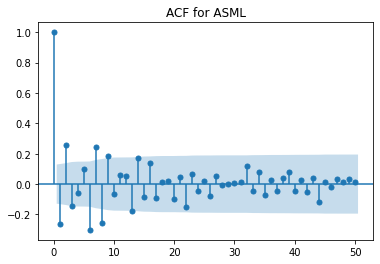

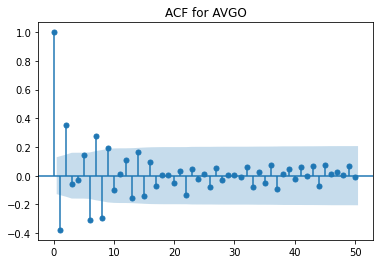

In [126]:
for a in df_stocks_scaled:
    sm.graphics.tsa.plot_acf(df_stocks_scaled[a], lags = 50)
    plt.title('ACF for %s' % a)
    plt.show()

STATIONARY TEST: 

 Dickey-Fuller Stationary Test for "BRK-A" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -4.7067
 No. Lags Chosen      = 6
 Critical value 1%     = -3.46
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0001. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "AMZN" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -17.4941
 No. Lags Chosen      = 0
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "GOOG" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -3.9168
 No. Lags Chosen      = 8

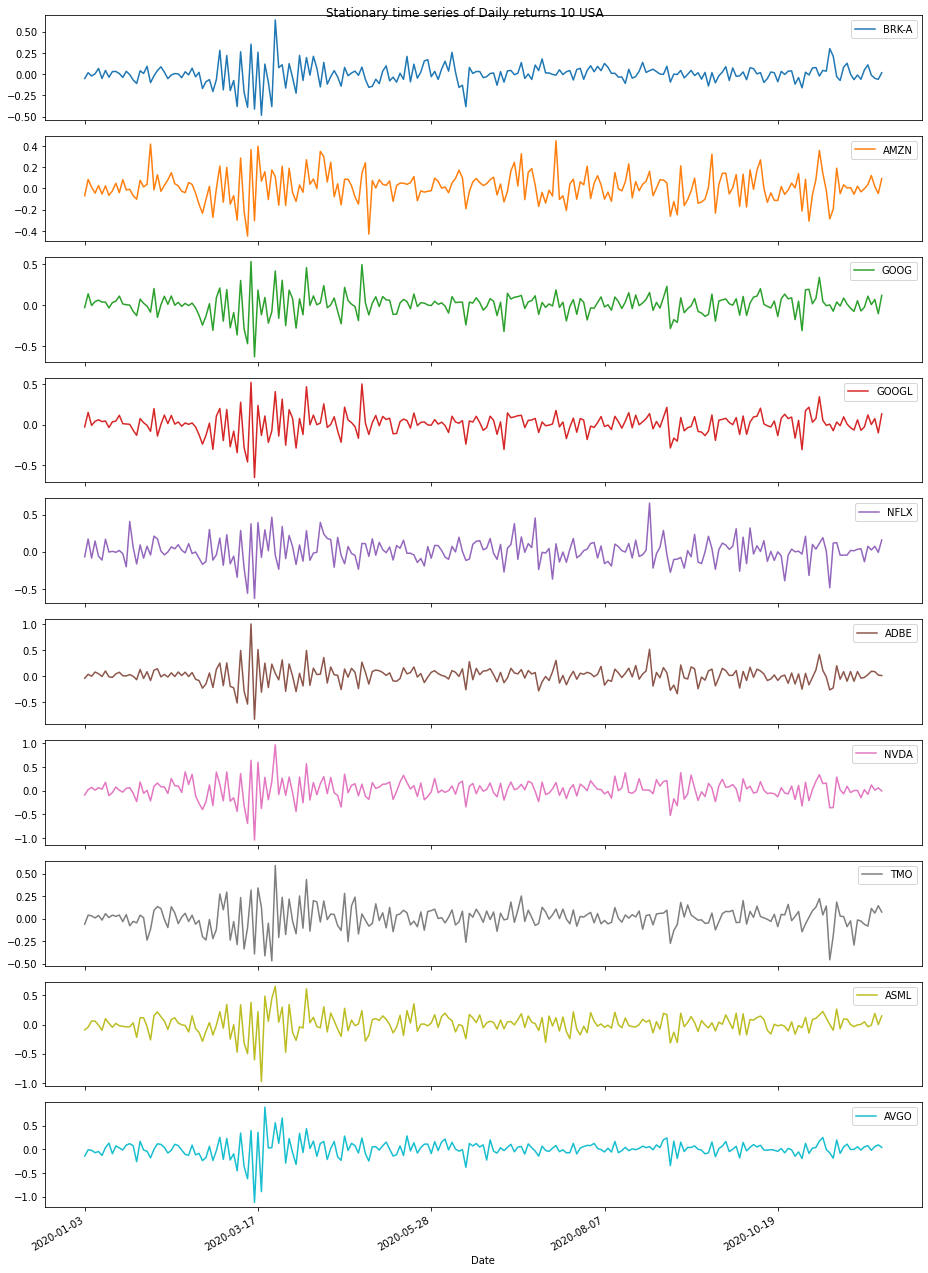


GRANGER CAUSALITY MATRIX: 



,BRK-A_x,AMZN_x,GOOG_x,GOOGL_x,NFLX_x,ADBE_x,NVDA_x,TMO_x,ASML_x,AVGO_x
BRK-A_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AMZN_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GOOG_y,0.0,0.31,0.0,0.254,0.0,0.0,0.121,0.0,0.0,0.0
GOOGL_y,0.0,0.346,0.307,0.0,0.0,0.0,0.116,0.0,0.0,0.0
NFLX_y,0.0,0.0,0.0,0.0,0.0,0.0,0.124,0.211,0.0,0.0
ADBE_y,0.0,0.0,0.0,0.0,0.249,0.0,0.0,0.0,0.127,0.0
NVDA_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TMO_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ASML_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVGO_y,0.0,0.388,0.0,0.0,0.0,0.0,0.0,0.0,0.492,0.0


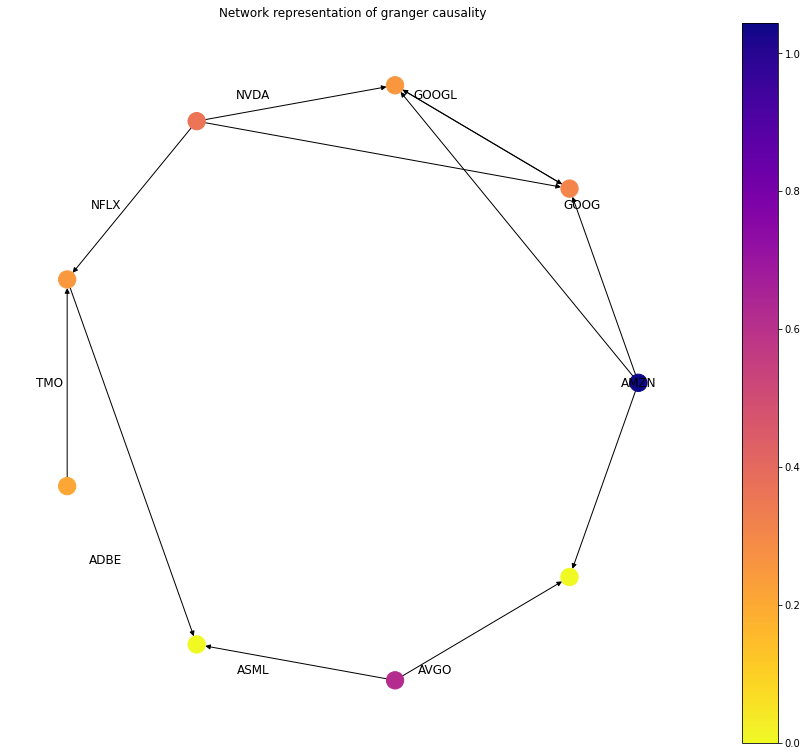

In [127]:
title_plot = 'Daily returns 10 ' + country
granger_matrix = granger_causality(df_stocks_scaled, stocks_interest, title_plot, country + '10')